In [1]:
import pandas as pd

# downloaod csv from https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_positive_cases_by_municipality.csv
data = pd.read_csv('data/130001_tokyo_covid19_positive_cases_by_municipality.csv', parse_dates = ['公表_年月日', ], low_memory=False)

In [2]:
data = data[(data['公表_年月日'] >= '2021-04-01') & (data['公表_年月日'] < '2021-09-01')]
data = data[data['市区町村名'].str.contains('.*区$', na=False)]

daily = data.groupby(['公表_年月日', "市区町村名"], as_index=False).agg({'陽性者数': lambda x: x})
daily = daily.rename(columns={'size': 'count'})


In [3]:
pivot_df = pd.pivot_table(daily, index='公表_年月日', columns='市区町村名', values='陽性者数', margins=True, aggfunc=sum, dropna=False)
pivot_df = pivot_df.drop('All', axis=0)
pivot_df = pivot_df.drop('All', axis=1)

<AxesSubplot:xlabel='公表_年月日'>

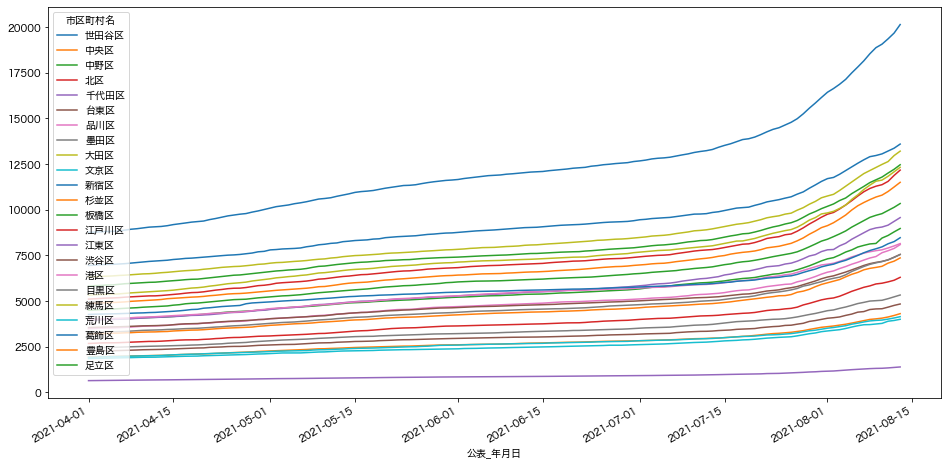

In [4]:
pivot_df.plot(figsize=(16, 8))

In [5]:
# ref. `第１表` https://www.toukei.metro.tokyo.lg.jp/juukiy/2021/jy21000001.htm

population_dict = {
    '千代田区': 37787,
    '中央区': 95812,
    '港区': 146527,
    '新宿区': 219464,
    '文京区': 123472,
    '台東区': 123068,
    '墨田区': 155354,
    '江東区': 274831,
    '品川区': 228061,
    '目黒区': 158367,
    '大田区': 398687,
    '世田谷区': 490342,
    '渋谷区': 140170,
    '中野区': 207425,
    '杉並区': 325403,
    '豊島区': 178637,
    '北区': 199016,
    '荒川区': 117153,
    '板橋区': 315872,
    '練馬区': 380495,
    '足立区': 357044,
    '葛飾区': 238563,
    '江戸川区': 346934,
}

In [6]:
def calc_percent(x):
    return float(x['陽性者数']/population_dict[x['市区町村名']]*100)

percent = daily.apply(calc_percent, axis='columns')

daily = pd.concat([daily, percent.to_frame()], axis='columns', join='outer')

In [7]:
pivot_rate_df = pd.pivot_table(daily, index='公表_年月日', columns='市区町村名', values=0, margins=True, aggfunc=sum, dropna=False)
pivot_rate_df = pivot_rate_df.drop('All', axis=0)
pivot_rate_df = pivot_rate_df.drop('All', axis=1)

<AxesSubplot:xlabel='公表_年月日'>

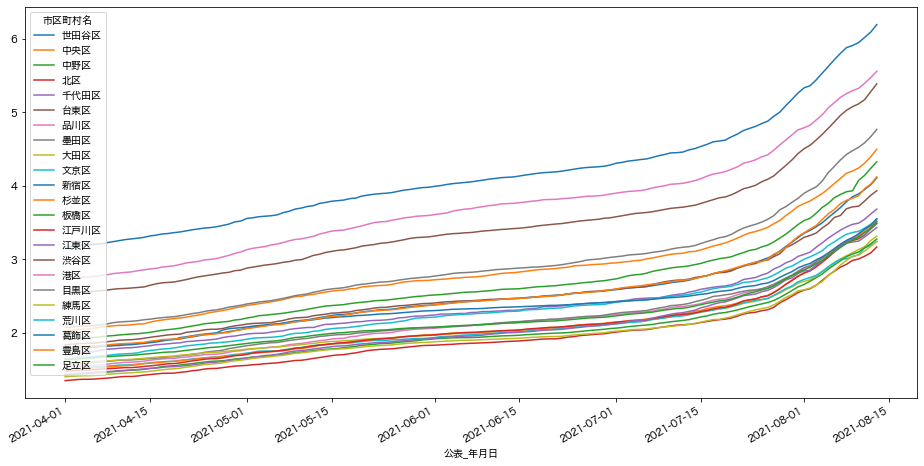

In [8]:
pivot_rate_df.plot(figsize=(16, 8))